In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [2]:
df = pd.read_csv('IMDB Dataset.csv')
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [4]:
df['sentiment'] = [1 if sentiment == 'positive' else 0 for sentiment in df['sentiment']]
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1


In [5]:
import seaborn as sns

c:\Users\rahul\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sentiment', ylabel='count'>

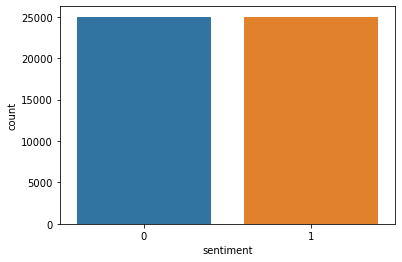

In [6]:
sns.countplot(df['sentiment'])


In [7]:
df['sentiment'].value_counts()

1    25000
0    25000
Name: sentiment, dtype: int64

In [8]:
import re
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rahul\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [9]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [10]:
from tqdm import tqdm
corpus = []
for i in tqdm(range(0,len(df))):
    sentence = re.sub('[^a-zA-Z]',' ',df['review'][i]) ## each review is each sentence
    sentence = sentence.lower() ## Lower casing the words in each sentence
    sentence = sentence.split() ## splitting sentences to words and storing it as a list of words
    sentence = [ps.stem(word) for word in sentence if not word in stopwords.words('english')]  ## Removing stop words and applying stemming 
    sentence = ' '.join(sentence)  ## Joining words again to form the sentences
    corpus.append(sentence) ### storing each sentences to corpus

100%|██████████| 50000/50000 [50:06<00:00, 16.63it/s]  


In [11]:
## Creating bag of words model
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=2500)
X1 = cv.fit_transform(corpus).toarray()

In [12]:
y1 = pd.get_dummies(df['sentiment'])
y1 = y1.iloc[:,1].values

In [13]:
from sklearn.model_selection import train_test_split
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1,y1,test_size = 0.20, random_state=0)

In [14]:
X_train1.shape

(40000, 2500)

In [15]:
y_train1.shape

(40000,)

In [16]:
from sklearn.naive_bayes import MultinomialNB
model1 = MultinomialNB().fit(X_train1,y_train1)

In [17]:
y_pred1 = model1.predict(X_test1)

In [18]:
from sklearn.metrics import accuracy_score, classification_report
print(accuracy_score(y_test1,y_pred1))
print(classification_report(y_pred1,y_test1))

0.8369
              precision    recall  f1-score   support

           0       0.84      0.84      0.84      5052
           1       0.83      0.84      0.84      4948

    accuracy                           0.84     10000
   macro avg       0.84      0.84      0.84     10000
weighted avg       0.84      0.84      0.84     10000



In [38]:
new_review = 'This movie is art'
new_review = re.sub('[^a-zA-Z]', ' ', new_review)
new_review = new_review.lower()
new_review = new_review.split()
ps = PorterStemmer()
all_stopwords = stopwords.words('english')
all_stopwords.remove('not')
new_review = [ps.stem(word) for word in new_review if not word in set(all_stopwords)]
new_review = ' '.join(new_review)
new_corpus = [new_review]
new_X_test = cv.transform(new_corpus).toarray()
new_y_pred = model1.predict(new_X_test)
print(new_y_pred)

[1]


TF-IDF

In [39]:
## Creating tf-idf model
from sklearn.feature_extraction.text import TfidfVectorizer
tv = TfidfVectorizer(max_features=2500)
X2 = tv.fit_transform(corpus).toarray()

In [40]:
y2=pd.get_dummies(df['sentiment'])
y2=y2.iloc[:,1].values

In [41]:
from sklearn.model_selection import train_test_split
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2,y2, test_size=0.20, random_state=0)

In [42]:
X_train2.shape

(40000, 2500)

In [43]:
y_train2.shape

(40000,)

In [44]:
from sklearn.naive_bayes import MultinomialNB
model2 = MultinomialNB().fit(X_train2, y_train2)

In [45]:
y_pred2 = model2.predict(X_test2)

In [46]:
print(accuracy_score(y_test2,y_pred2))
print(classification_report(y_pred2,y_test2))

0.8448
              precision    recall  f1-score   support

           0       0.83      0.85      0.84      4923
           1       0.85      0.84      0.85      5077

    accuracy                           0.84     10000
   macro avg       0.84      0.84      0.84     10000
weighted avg       0.85      0.84      0.84     10000



Making a New Prediction

In [47]:
new_review = 'I Hate this movie so much. It\'s ok.'
new_review = re.sub('[^a-zA-Z]', ' ', new_review)
new_review = new_review.lower()
new_review = new_review.split()
ps = PorterStemmer()
all_stopwords = stopwords.words('english')
all_stopwords.remove('not')
new_review = [ps.stem(word) for word in new_review if not word in set(all_stopwords)]
new_review = ' '.join(new_review)
new_corpus = [new_review]
new_X_test = cv.transform(new_corpus).toarray()
new_y_pred = model2.predict(new_X_test)
print(new_y_pred)

[0]


Word2Vec

In [50]:
import gensim.downloader as api
wv = api.load('word2vec-google-news-300')

[==================================================] 100.0% 1662.8/1662.8MB downloaded


In [51]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

In [53]:
import nltk

In [54]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\rahul\AppData\Roaming\nltk_data...


True

In [55]:
from tqdm import tqdm
corpus1 = []
for i in tqdm(range(0,len(df))):
    sentence = re.sub('[^a-zA-Z]',' ',df['review'][i]) ## each review is each sentence
    sentence = sentence.lower() ## Lower casing the words in each sentence
    sentence = sentence.split() ## splitting sentences to words and storing it as a list of words
    sentence = [lemmatizer.lemmatize(word) for word in sentence if not word in stopwords.words('english')]  ## Removing stop words and applying Lemmatizer 
    sentence = ' '.join(sentence)  ## Joining words again to form the sentences
    corpus1.append(sentence) ### storing each sentences to corpus

100%|██████████| 50000/50000 [47:50<00:00, 17.42it/s]  


In [56]:
from nltk import sent_tokenize
from gensim.utils import simple_preprocess

In [61]:
words = []
for sent in corpus1:
    sent_token = sent_tokenize(sent)
    for sent in sent_token:
        words.append(simple_preprocess(sent))

LookupError: 
**********************************************************************
  Resource [93mpunkt[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt/english.pickle[0m

  Searched in:
    - 'C:\\Users\\rahul/nltk_data'
    - 'c:\\Users\\rahul\\anaconda3\\nltk_data'
    - 'c:\\Users\\rahul\\anaconda3\\share\\nltk_data'
    - 'c:\\Users\\rahul\\anaconda3\\lib\\nltk_data'
    - 'C:\\Users\\rahul\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
    - ''
**********************************************************************


In [58]:
import gensim
model3 = gensim.models.Word2Vec(words,window=5,min_count=2)

RuntimeError: you must first build vocabulary before training the model

In [ ]:
model3.corpus_count

In [ ]:
model3.epochs

In [ ]:
def avg_word2vec(doc):
    return np.mean([model3.wv[word] for word in doc if word in model3.wv.index_to_key], axis=0) 

In [ ]:
X3 = []
for i in tqdm(range(len(words))):
    X3.append(avg_word2vec(words[i]))

In [ ]:
type(X3)

In [ ]:
X_new = np.array(X3)

In [ ]:
X_new.shape

In [ ]:
y3=pd.get_dummies(df['sentiment'])
y3=y3.iloc[:,1].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train3, X_test3, y_train3, y_test3 = train_test_split(X_new,y3, test_size=0.20, random_state=0)

In [ ]:
X_train3.shape

In [ ]:
y_train3.shape

In [ ]:
from sklearn.svm import SVC
model4 = SVC(kernel='rbf', random_state=0).fit(X_train3, y_train3)

In [ ]:
y_pred3 = model4.predict(X_test3)

In [ ]:
print(accuracy_score(y_test3,y_pred3))
print(classification_report(y_pred3,y_test3))

In [ ]:
new_review = 'The Dr.Strange MOM movie was great.'
new_review = re.sub('[^a-zA-Z]', ' ', new_review)
new_review = new_review.lower()
new_review = new_review.split()
all_stopwords = stopwords.words('english')
all_stopwords.remove('not')
new_review = [lemmatizer.lemmatize(word) for word in new_review if not word in set(all_stopwords)]
new_review = ' '.join(new_review)
new_corpus = [new_review]

new_words=[]
for sent in new_corpus:
    sent_token = sent_tokenize(sent)
    for sent in sent_token:
        new_words.append(simple_preprocess(sent))
        
new_X3 = []
for i in range(len(new_words)):
    new_X3.append(avg_word2vec(new_words[i]))
    
new_X = np.array(new_X3)
new_y_pred = model4.predict(new_X)
print(new_y_pred)